In [36]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torchvision import transforms
import os

In [37]:
custom_image_path ="cat.jpg"

In [38]:
import torchvision

custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

# Đưa pixel về khoảng [0,1]
custom_image = custom_image / 255.0

In [39]:
IMAGE_SIZE = (224,224)

custom_image_transform = transforms.Compose(
    [
        transforms.Resize(IMAGE_SIZE),
    ]
)

custom_image_transformed = custom_image_transform(custom_image)

print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 900, 900])
New shape: torch.Size([3, 224, 224])


c:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Lấy mô hình đã xây 

In [40]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_layer_1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(num_features=64),
            nn.MaxPool2d(kernel_size=2),
        )
        self.conv_layer_2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(num_features=512),
            nn.MaxPool2d(2),
        )
        self.conv_layer_3 = nn.Sequential(
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(num_features=512),
            nn.MaxPool2d(2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(), nn.Linear(in_features=512 * 3 * 3, out_features=2)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_layer_1(x)
        x = self.conv_layer_2(x)
        x = self.conv_layer_3(x)
        x = self.conv_layer_3(x)
        x = self.conv_layer_3(x)
        x = self.conv_layer_3(x)
        x = self.classifier(x)
        return x


# Instantiate an object.
model = CNN()

In [41]:
device = torch.device("cpu")

In [42]:
model.load_state_dict(torch.load("../cat-dog-model.pth", map_location=device))
model.to(device)

CNN(
  (conv_layer_1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer_2): Sequential(
    (0): Conv2d(64, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer_3): Sequential(
    (0): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features

In [43]:
model.eval()
with torch.no_grad():
    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)
    custom_image_pred = model(custom_image_transformed.unsqueeze(dim=0).to(device))

In [44]:
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Dự đoán: {custom_image_pred_label}")

Dự đoán: tensor([0])


In [45]:
class_names = ["cats", "dogs"]
custom_image_pred_class = class_names[
    custom_image_pred_label
] 
custom_image_pred_class

'cats'

(-0.5, 899.5, 899.5, -0.5)

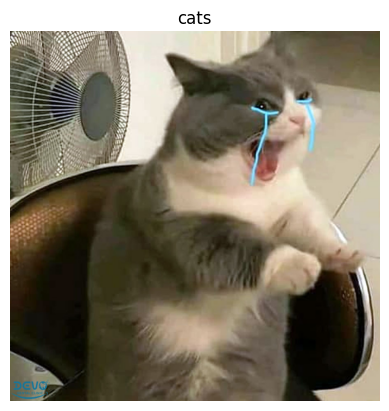

In [46]:
plt.imshow(
    custom_image.permute(1, 2, 0)
) 
plt.title(custom_image_pred_class)
plt.axis(False)